In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv('Rotten_Tomatoes_Movies3.csv')


In [5]:
# Exploratory Data Analysis (EDA)

# Display basic information about the dataset
print("Dataset Info:\n")
data.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  fl

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [7]:
# Basic statistics of numerical columns
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16483.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
std             25.028011           28.587230          66.383800   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000   
50%             99.000000           66.000000          28.000000   
75%            111.000000           86.000000          76.000000   
max           2000.000000          100.000000         497.000000   

       audience_rating  
count     16386.000000  
mean         60.470829  
std          20.462368  
min           0.000000  
25%          45.000000  
50%          62.000000  
75%          77.000000  
max         100.000000  


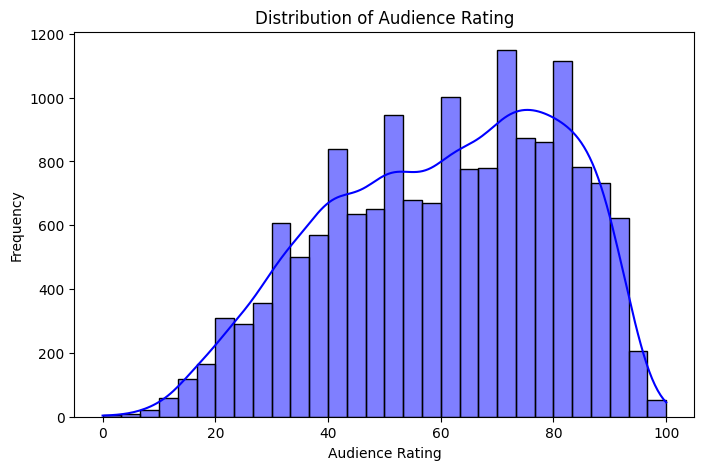

In [8]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['audience_rating'], kde=True, bins=30, color='blue')
plt.title("Distribution of Audience Rating")
plt.xlabel("Audience Rating")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Check unique values in categorical columns
categorical_columns = ['rating', 'genre', 'directors', 'studio_name']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", data[col].unique())


Unique values in 'rating':
 ['PG' 'R' 'NR' 'G' 'PG-13' 'PG-13)' 'NC17' 'R)']

Unique values in 'genre':
 ['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy' 'Comedy'
 'Comedy, Romance' ... 'Art House & International, Romance'
 'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense'
 'Animation, Drama, Romance']

Unique values in 'directors':
 ['Chris Columbus' 'Nicole Holofcener' 'Blake Edwards' ... 'Colin McIvor'
 'Frank Coraci, Walt Becker' 'Byron Howard, Rich Moore, Jared Bush']

Unique values in 'studio_name':
 ['20th Century Fox' 'Sony Pictures Classics' 'Waner Bros.' ...
 'Triumph Films' 'Typecast Pictures' 'Tango Entertainment']


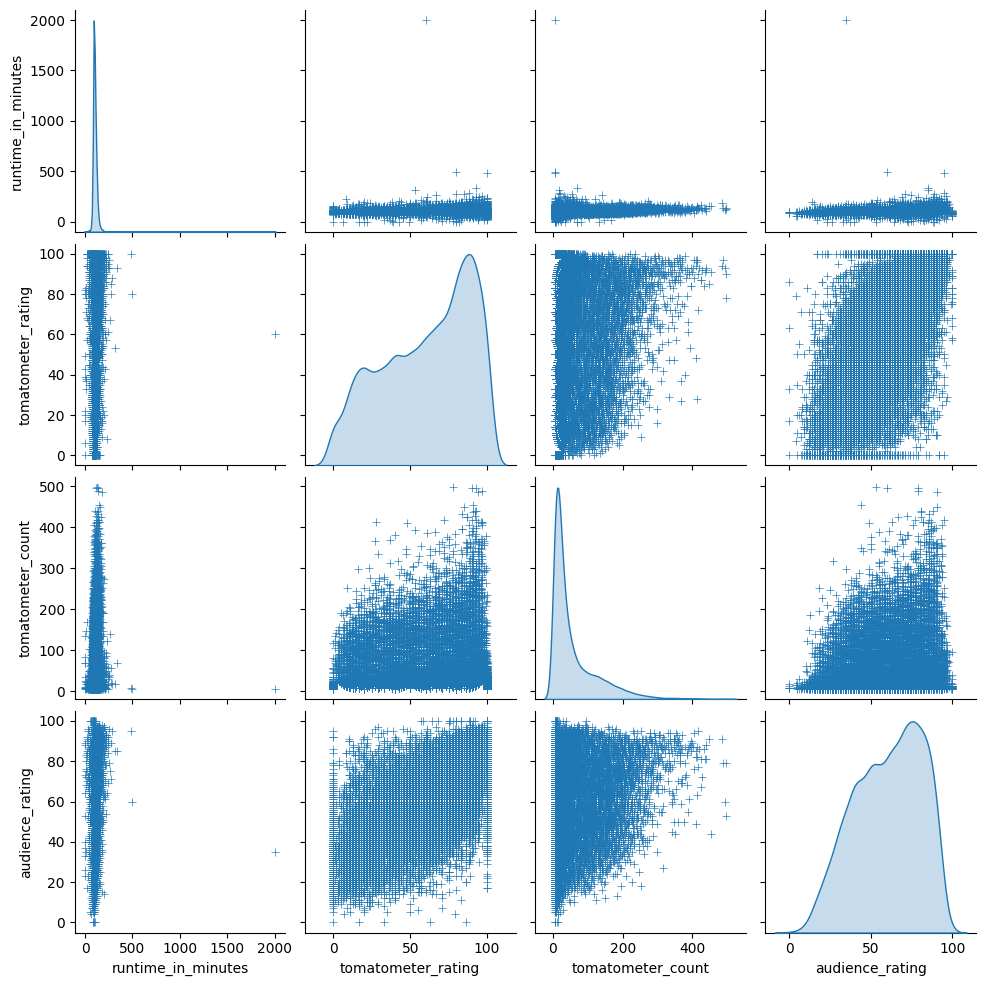

In [10]:
# Pairplot for numerical features
numerical_columns = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']
sns.pairplot(data[numerical_columns].dropna(), diag_kind='kde', markers='+')
plt.show()


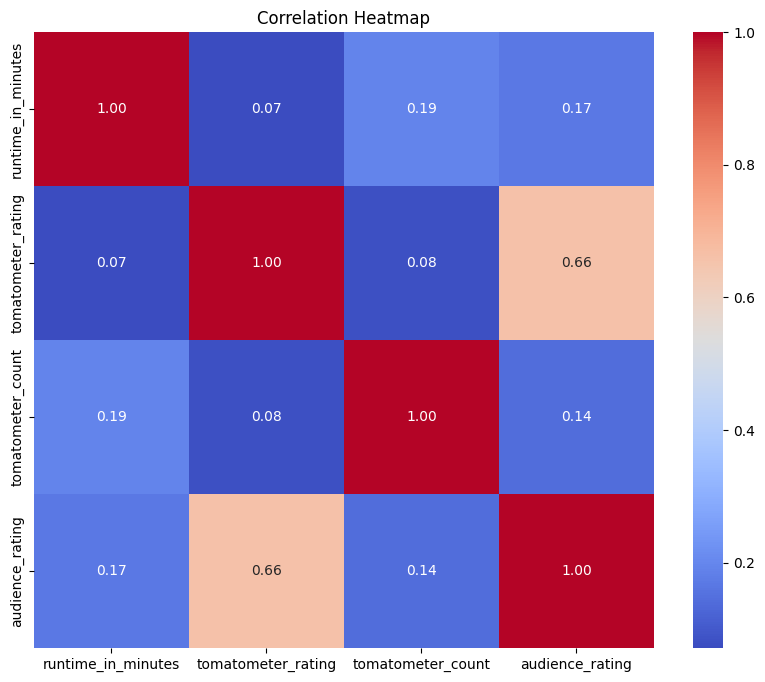

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\prase\AppData\Local\Temp\ipykernel_20200\2429002104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


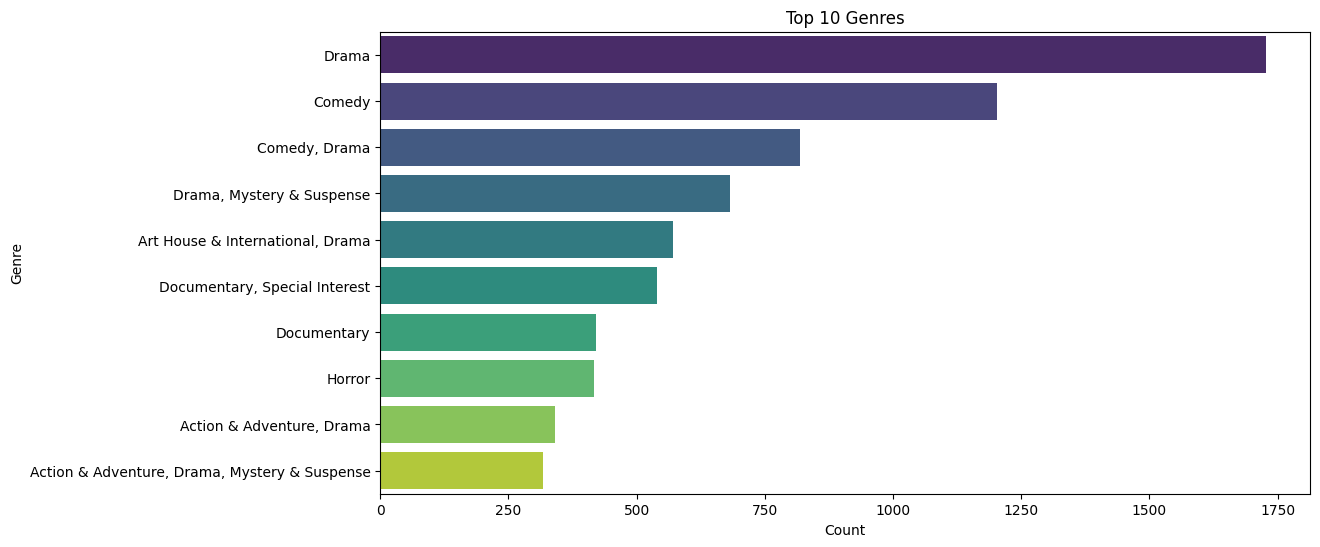

In [13]:
# Genre analysis
plt.figure(figsize=(12, 6))
genre_counts = data['genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


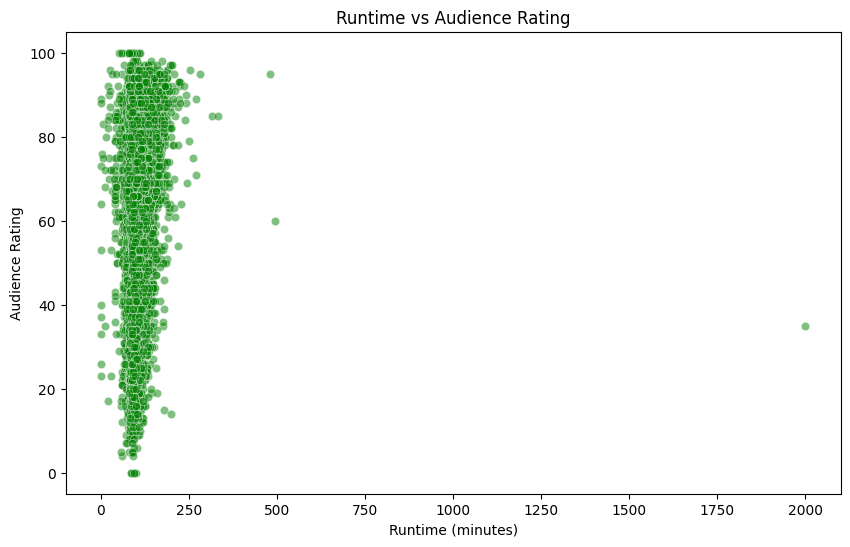

In [12]:
# Runtime vs Audience Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['runtime_in_minutes'], y=data['audience_rating'], alpha=0.5, color='green')
plt.title("Runtime vs Audience Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Audience Rating")
plt.show()

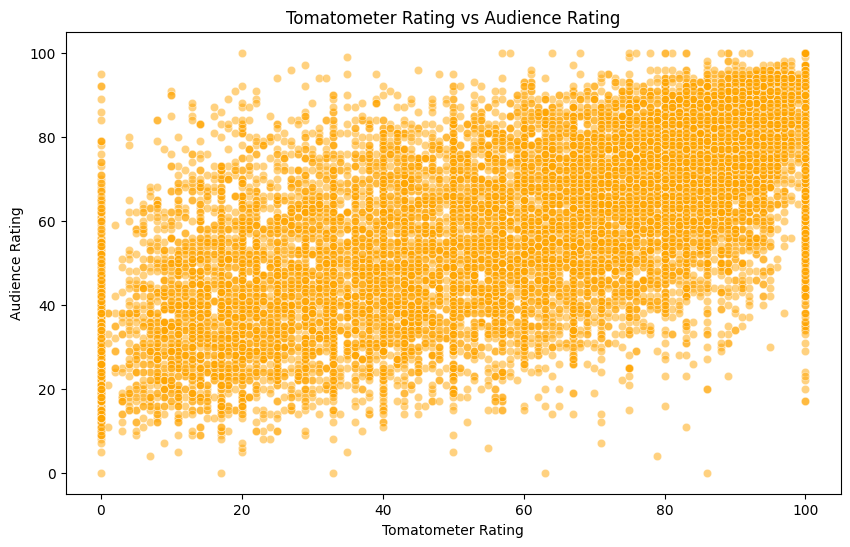

In [14]:
# Tomatometer Rating vs Audience Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['tomatometer_rating'], y=data['audience_rating'], alpha=0.5, color='orange')
plt.title("Tomatometer Rating vs Audience Rating")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Audience Rating")
plt.show()

In [15]:
# Handle missing values for the target variable
data = data.dropna(subset=['audience_rating'])

In [17]:

# Select relevant features for prediction
features = ['rating', 'genre', 'directors', 'runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']
target = 'audience_rating'

In [18]:
# Define categorical and numerical features
categorical_features = ['rating', 'genre', 'directors']
numerical_features = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']

In [25]:
# Preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [28]:
# Define the model
model = RandomForestRegressor(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])




In [29]:
# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runtime_in_minutes',
                                                   'tomatometer_rating',
                                                   'tomatometer_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating', 'genre',
                                                   'directors'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [32]:

# Predict and evaluate
predictions = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [33]:
# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 11.49
Mean Squared Error (MSE): 217.50
Root Mean Squared Error (RMSE): 14.75


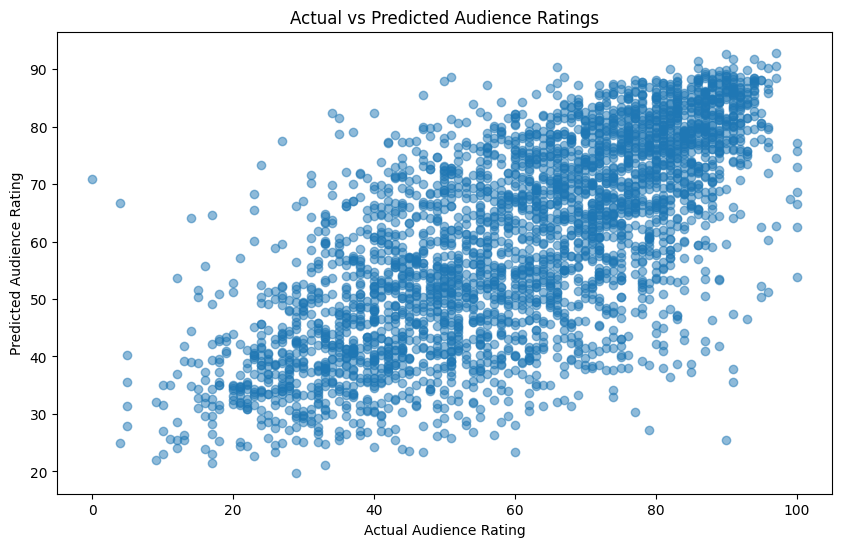

In [35]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Audience Rating")
plt.ylabel("Predicted Audience Rating")
plt.title("Actual vs Predicted Audience Ratings")
plt.show()